#  This is a Chi's notebook for Project I - Group 3

## Data Cleaning

In [1]:
#Dependencies
import os
import pandas as pd
import calendar
import scipy.stats as st
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pingouin as pg 

%matplotlib inline
UTDATED_IGNORE=1

In [2]:
csvDir = os.path.join("Resources")
col_list = ["month_of_death","day_of_week_of_death","current_data_year",
                              "manner_of_death","358_cause_recode","sex","detail_age"]
masterDf = pd.DataFrame()
files = os.listdir(csvDir)
for file in files:
    if file.endswith(".csv"):
        curCsv = os.path.join(csvDir,file)
        with open(curCsv) as file:
            x = pd.read_csv(file, usecols=col_list)
            masterDf = pd.concat([masterDf,x],axis=0)

C:\Users\tranc27\Anaconda3\envs\NewPythonData\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.3.7.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
#Filter to only deaths related to cars
car_death_data = masterDf[(masterDf["358_cause_recode"] >=385) & (masterDf["358_cause_recode"] <=398)]
car_death_data.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,1,M,32,7,2005,1.0,396
208,1,M,75,5,2005,1.0,387
220,1,M,68,7,2005,1.0,396
234,2,M,21,1,2005,1.0,396
235,2,M,24,1,2005,1.0,396


In [4]:
#Clean up the dataframe so that it is readable
month_dict = {
      1:"January",
      2:"February",
      3:"March",
      4:"April",
      5:"May",
      6:"June",
      7:"July",
      8:"August",
      9:"September",
      10:"October",
      11:"November",
      12:"December"}
      
day_of_week_dict = {
      1:"Sunday",
      2:"Monday",
      3:"Tuesday",
      4:"Wednesday",
      5:"Thursday",
      6:"Friday",
      7:"Saturday",
      9:"Unknown"}

manner_of_death_dict = {
      1:"Accident",
      2:"Suicide",
      3:"Homicide",
      4:"Pending investigation",
      5:"Could not determine",
      6:"Self-Inflicted",
      7:"Natural"}
#       "Blank":"Not specified"}

cause_recode_dict = {
      385:" 385- Motor vehicle accidents",
      386:" 386- Pedestrian involved in collision with motor vehicle",
      387:" 387- Pedalcyclist involved in collision with motor vehicle",
      388:" 388- Motorcyclist involved in any accident except collision with railway train",
      389:" 389- Motor vehicle accident involving collision with railway train",
      390:" 390- Motorcyclist involved in collision with railway train",
      391:" 391- Other motor vehicle accident involving collision with railway train",
      392:" 392- Occupant of motor vehicle involved in collision with other (non- motorized) road vehicle, streetcar, animal or pedestrian",
      393:" 393- Occupant of car, pickup truck or van involved in collision with other motor vehicle",
      394:" 394- Occupant of heavy transport vehicle or bus involved in collision with other motor vehicle",
      395:" 395- Occupant of motor vehicle involved in non-collision accident",
      396:" 396- Occupant of special-use motor vehicle involved in any accident",
      397:" 397- Other and unspecified motor vehicle accidents",
      398:" 398- Streetcar accidents"}
    

clean_df = car_death_data.replace({"month_of_death": month_dict, 
                        "day_of_week_of_death": day_of_week_dict,
                        "manner_of_death": manner_of_death_dict,
                        "358_cause_recode": cause_recode_dict})

clean_df.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,January,M,32,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
208,January,M,75,Thursday,2005,Accident,387- Pedalcyclist involved in collision with ...
220,January,M,68,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
234,February,M,21,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...
235,February,M,24,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...


In [5]:
#  check quality of data
#  list all unique values in each columns

colNames = list(clean_df.columns)
for col in colNames:
    print(col)
    print(f"{clean_df[col].unique()}")
    print("----------")

month_of_death
['January' 'February' 'March' 'April' 'June' 'May' 'July' 'August'
 'September' 'October' 'November' 'December']
----------
sex
['M' 'F']
----------
detail_age
[ 32  75  68  21  24  25  44  49  40  11  14  64  57  18   9  54  31  42
  27  43  58  46  33  22  13  61  56  16  53  30  23  26  20  83  34  38
  85  15   1  47  65  72  52  17  28  12  19  48  45  50  66  81  41  62
  59  69  39  37  63  78  80  35  73  36  90 999  82  55  51   2  60  70
  29  91  79   7  84  76   8   5  77  89  74   4  10  88  86   6   3  71
  67  92 101  94  87  93  97  96 102 100  99  95  98 106 104 103 107]
----------
day_of_week_of_death
['Saturday' 'Thursday' 'Sunday' 'Tuesday' 'Wednesday' 'Monday' 'Friday'
 'Unknown']
----------
current_data_year
[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
----------
manner_of_death
['Accident' 'Natural' 'Could not determine' 'Homicide' nan
 'Pending investigation' 'Suicide']
----------
358_cause_recode
[' 396- Occupant of special-use motor 

In [6]:
#  Clean up
#  Remove not logical data 
# ie: age of 999, day of week : Unknown, manner_of_death nan, need filter by Accident
finalDf = clean_df[clean_df["detail_age"] != 999]
finalDf = finalDf[finalDf["manner_of_death"] == "Accident"]
finalDf =  finalDf[finalDf["day_of_week_of_death"] != "Unknown"]

# Enforcing order of day of week and months
finalDf['day_of_week_of_death'] = pd.Categorical(finalDf['day_of_week_of_death'], categories=
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'],ordered=True)

finalDf["month_of_death"] =  pd.Categorical(finalDf['month_of_death'], categories=
    ["January","February","March","April","May","June","July","August","September","October","November","December"],ordered=True)
 
finalDf.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode
207,January,M,32,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
208,January,M,75,Thursday,2005,Accident,387- Pedalcyclist involved in collision with ...
220,January,M,68,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...
234,February,M,21,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...
235,February,M,24,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...


In [7]:
# Label day of week
weekdayList = ['Monday','Tuesday','Wednesday','Thursday']
weekendList = ['Friday','Saturday', 'Sunday']

finalDf.loc[finalDf["day_of_week_of_death"].isin(weekdayList), 'weekday_label'] = 'weekday'
finalDf.loc[finalDf["day_of_week_of_death"].isin(weekendList), 'weekday_label'] = 'weekend'

# Label sesonality 
# Spring runs from March 1 to May 31;
# Summer runs from June 1 to August 31;
# Fall (autumn) runs from September 1 to November 30; and
# Winter runs from December 1 to February 28 (February 29 in a leap year).
winter = ["December","January","February"]
spring = ["March","April","May"]
summer = ["June","July","August"]
fall = ["September","October","November"]

finalDf.loc[finalDf["month_of_death"].isin(winter), 'season_label'] = 'winter'
finalDf.loc[finalDf["month_of_death"].isin(spring), 'season_label'] = 'spring'
finalDf.loc[finalDf["month_of_death"].isin(summer), 'season_label'] = 'summer'
finalDf.loc[finalDf["month_of_death"].isin(fall), 'season_label'] = 'fall'

# categorical
finalDf["season_label"] =  pd.Categorical(finalDf["season_label"], categories=
    ["winter","spring","summer","fall"],ordered=True)

# Each row is a death
finalDf["death"] = 1
finalDf.head()

,month_of_death,sex,detail_age,day_of_week_of_death,current_data_year,manner_of_death,358_cause_recode,weekday_label,season_label,death
207,January,M,32,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...,weekend,winter,1
208,January,M,75,Thursday,2005,Accident,387- Pedalcyclist involved in collision with ...,weekday,winter,1
220,January,M,68,Saturday,2005,Accident,396- Occupant of special-use motor vehicle in...,weekend,winter,1
234,February,M,21,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...,weekend,winter,1
235,February,M,24,Sunday,2005,Accident,396- Occupant of special-use motor vehicle in...,weekend,winter,1


# Which months have the most automotive death?

## Hypothesis
### Ho = the mean total death is the same for all months

Text(0.5, 1.0, 'Total Number of Motor Vehicle Related Deaths between month of year, per year from 2005-2015')

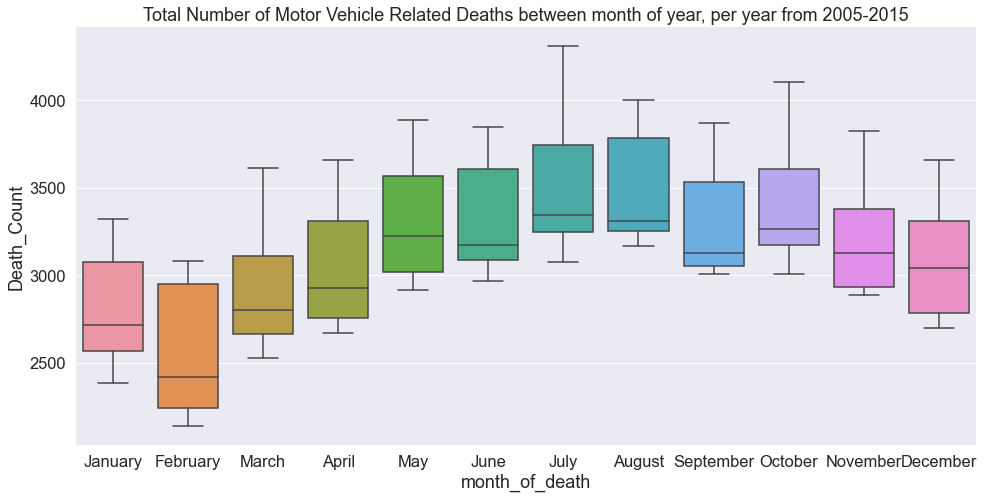

In [8]:
# group by month
monthStats = finalDf.groupby(["month_of_death","current_data_year"])\
                .agg( Death_Count =("death","sum"))\
                                    .reset_index("current_data_year").reset_index("month_of_death")
sns.set(font_scale=1.5)

fig1 = sns.catplot(x = "month_of_death",       # x variable name
            y = "Death_Count",       # y variable name
            data =monthStats,     # dataframe to plot
            kind = "box",
            height=7,    
            aspect=2) 

plt.title('Total Number of Motor Vehicle Related Deaths between month of year, per year from 2005-2015')

## Results:
### 1. p < .05 from Anova we reject the null hypothesis.
       We can then conclude that the mean of total death is NOT the same for all months
       and that at least 2 groups are different from each other.
   
### 2. Based on the plot above, we ran a fOneway test comapring bewteen Feb and August. P<0.05 reject the null hypothesis
       We can then conclude that the mean of total death is NOT the same for Feb 
       and Aug 2 groups are different from each other.

In [9]:
monthLevene = pg.homoscedasticity(data=monthStats, dv='Death_Count', group="month_of_death")
monthAnova = pg.anova(data=monthStats, dv='Death_Count', between="month_of_death")
February = monthStats[monthStats["month_of_death"] == 'July']["Death_Count"]
August = monthStats[monthStats["month_of_death"] == 'August']["Death_Count"]
monthFOneway = stats.f_oneway(February, August)
print("================")
print("Levene Summary")
print("================")
pg.print_table(monthLevene)
pg.print_table(monthAnova)
print("================")
print("Feb vs. Aug")
print("================")
monthFOneway

Levene Summary
    W    pval  equal_var
-----  ------  -----------
0.072   1.000  True


ANOVA SUMMARY

Source            ddof1    ddof2      F    p-unc    np2
--------------  -------  -------  -----  -------  -----
month_of_death       11      120  7.664    0.000  0.413

Feb vs. Aug


F_onewayResult(statistic=0.00010788018826291518, pvalue=0.9918157990446276)

# Which seasons have the most automotive death?

## Hypothesis
### Ho = the mean total death is the same for all seasons

Text(0.5, 1.0, 'Total Number of Motor Vehicle Related Deaths Across Seasons Per Year From 2005-2015')

<Figure size 1080x576 with 0 Axes>

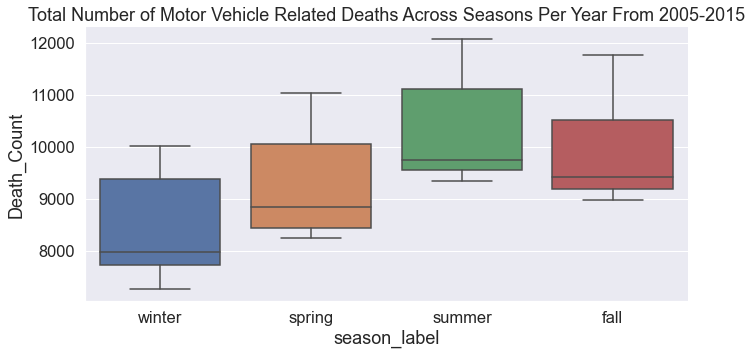

In [10]:
# Group by season
seasonStats = finalDf.groupby(["season_label","current_data_year"])\
                .agg( Death_Count =("death","sum"))\
                                  .reset_index("current_data_year").reset_index("season_label")
fig2 = plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
fig2 = sns.catplot(x = "season_label",       # x variable name
            y = "Death_Count",       # y variable name
            data =seasonStats,     # dataframe to plot
            kind = "box",
            height=5,    
            aspect=2) 
plt.title('Total Number of Motor Vehicle Related Deaths Across Seasons Per Year From 2005-2015')

## Results:
### 1. p < .05 from Anova we reject the null hypothesis.
       We can then conclude that the mean of total death is NOT the same for all season
       and that at least 2 groups are different from each other.
   
### 2. p <0.5 from post-hoc pairwise-Tukey shows determine which seasons have different means

### 3. Unpexctedly post-hoc pairwiseTuket shows summer and winter are from the same population. We then try F-Oneway. p<0.05 reject the null hypothesis.


In [11]:
seasonLevene = pg.homoscedasticity(data=seasonStats, dv='Death_Count', group="season_label")
seasonAnova = pg.anova(data=seasonStats, dv='Death_Count', between="season_label")
seasonPairwise = pd.DataFrame(pg.pairwise_tukey(data=seasonStats, dv='Death_Count', between="season_label"))
seasonMonthPair = seasonPairwise[seasonPairwise["p-tukey"]<0.05]
Winter = seasonStats[seasonStats["season_label"] == 'winter']["Death_Count"]
Summer = seasonStats[seasonStats["season_label"] == 'summer']["Death_Count"]
seasonFOneway = stats.f_oneway(Winter, Summer)
print("================")
print("Levene Summary")
print("================")
pg.print_table(seasonLevene)
pg.print_table(seasonAnova)
# print("================")
# print("Pairwise Test")
# print("================")
# seasonMonthPair
pg.print_table(seasonPairwise)
print("================")
print("FOneWay : Winter vs. Summer")
print("================")
seasonFOneway

Levene Summary
    W    pval  equal_var
-----  ------  -----------
0.004   1.000  True


ANOVA SUMMARY

Source          ddof1    ddof2      F    p-unc    np2
------------  -------  -------  -----  -------  -----
season_label        3       40  7.032    0.001  0.345


POST HOC TESTS

A       B         mean(A)    mean(B)       diff       se  tail            T    p-tukey    hedges
------  ------  ---------  ---------  ---------  -------  ---------  ------  ---------  --------
fall    spring   8441.000   9267.182   -826.182  445.349  two-sided  -1.855      0.252    -0.761
fall    summer   8441.000  10350.000  -1909.000  445.349  two-sided  -4.287      0.001    -1.758
fall    winter   8441.000   9940.455  -1499.455  445.349  two-sided  -3.367      0.005    -1.381
spring  summer   9267.182  10350.000  -1082.818  445.349  two-sided  -2.431      0.076    -0.997
spring  winter   9267.182   9940.455   -673.273  445.349  two-sided  -1.512      0.433    -0.620
summer  winter  10350.000   9940.455 

F_onewayResult(statistic=18.781165691792996, pvalue=0.00032243751192492423)

### 4. we plotted the distribution and we think the fOneway test result makes more senses. Summer and Winter have different total death from each other.


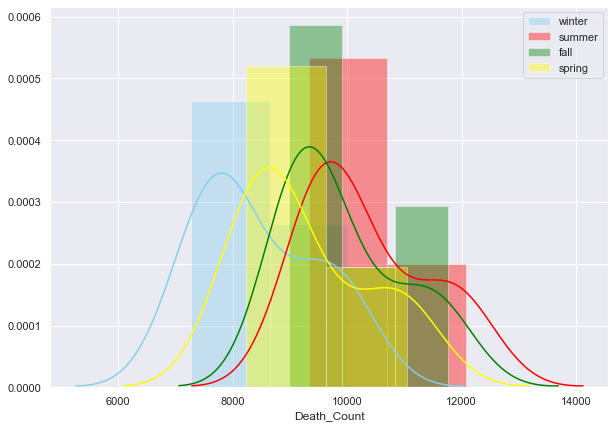

In [12]:
sns.set(font_scale=1.0)
fig3 = plt.figure(figsize=(10,7))
fig3 = sns.distplot(seasonStats[seasonStats["season_label"]=="winter"]["Death_Count"] , color="skyblue", label="winter")
fig3 = sns.distplot(seasonStats[seasonStats["season_label"]=="summer"]["Death_Count"] , color="red", label="summer")
fig3 = sns.distplot(seasonStats[seasonStats["season_label"]=="fall"]["Death_Count"] , color="green", label="fall")
fig3 = sns.distplot(seasonStats[seasonStats["season_label"]=="spring"]["Death_Count"] , color="yellow", label="spring")
plt.legend()

# Weekday or Weekend have the most automotive death?

## Hypothesis
### Ho = the mean death is the same for weekend and weekday

Text(0.5, 1.0, 'Total number of Motor Vehicle Related Deaths By Weekday and Month Per Year From 2005-2015')

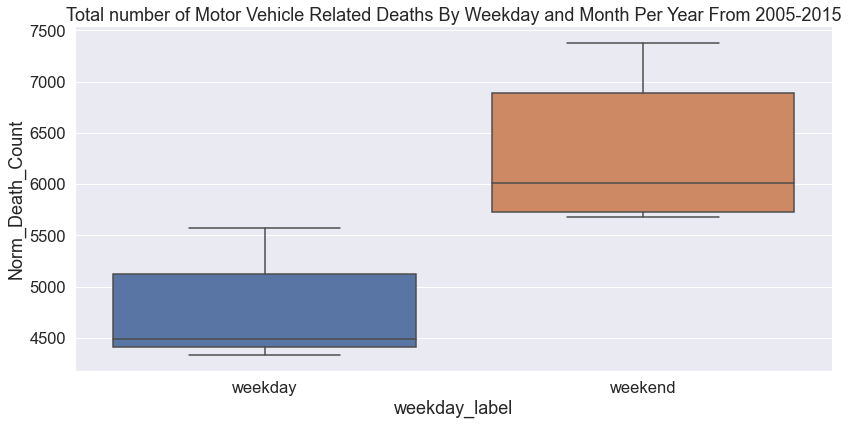

In [13]:
weekdayWeekendStats= finalDf.groupby(["current_data_year","weekday_label"])\
                .agg( Death_Count =("death","sum"),nDay = ("day_of_week_of_death","nunique"))\
                                    .reset_index("weekday_label").reset_index("current_data_year")
weekdayWeekendStats["Norm_Death_Count"] = weekdayWeekendStats["Death_Count"]/weekdayWeekendStats["nDay"]
sns.set(font_scale=1.5)
fig4 = sns.catplot(x = "weekday_label",       # x variable name
            y = "Norm_Death_Count",       # y variable name
            data = weekdayWeekendStats,     # dataframe to plot
            kind = "box",
            height=6,    
            aspect=2) 
plt.title('Total number of Motor Vehicle Related Deaths By Weekday and Month Per Year From 2005-2015')

## Results:
### 1. p < .05 from Anova we reject the null hypothesis.
       We can then conclude that the mean death is NOT the same for weekday and weekend
       and that at least 2 groups are different from each other.
   
### 2. p <0.5 fOneway also determine weekday and weekend have different means

In [14]:
weekdayweekendLevene = pg.homoscedasticity(data=weekdayWeekendStats, dv="Norm_Death_Count", group="weekday_label")
weekdayweekendAnova = pg.anova(data=weekdayWeekendStats, dv='Norm_Death_Count', between="weekday_label")
Weekday = weekdayWeekendStats[weekdayWeekendStats["weekday_label"] == 'weekday']["Norm_Death_Count"]
Weekend = weekdayWeekendStats[weekdayWeekendStats["weekday_label"] == 'weekend']["Norm_Death_Count"]
wwFOneway = stats.f_oneway(Weekend, Weekday)
print("================")
print("Levene Summary")
print("================")
pg.print_table(weekdayweekendLevene)
pg.print_table(weekdayweekendAnova)
print("================")
print("FOneWay : Weekend vs. Weekday")
print("================")
wwFOneway


Levene Summary
    W    pval  equal_var
-----  ------  -----------
0.584   0.454  True


ANOVA SUMMARY

Source           ddof1    ddof2       F    p-unc    np2
-------------  -------  -------  ------  -------  -----
weekday_label        1       20  33.381    0.000  0.625

FOneWay : Weekend vs. Weekday


F_onewayResult(statistic=33.38069240651289, pvalue=1.1836618460978226e-05)

# Men or Women is more likely to die on a weekend?

## Hypothesis
### Ho = the mean death is the same for men and women on a weekend

Text(0.5, 1.0, 'Total number of Motor Vehicle Related Deaths By Weekday and Month Per Year From 2005-2015')

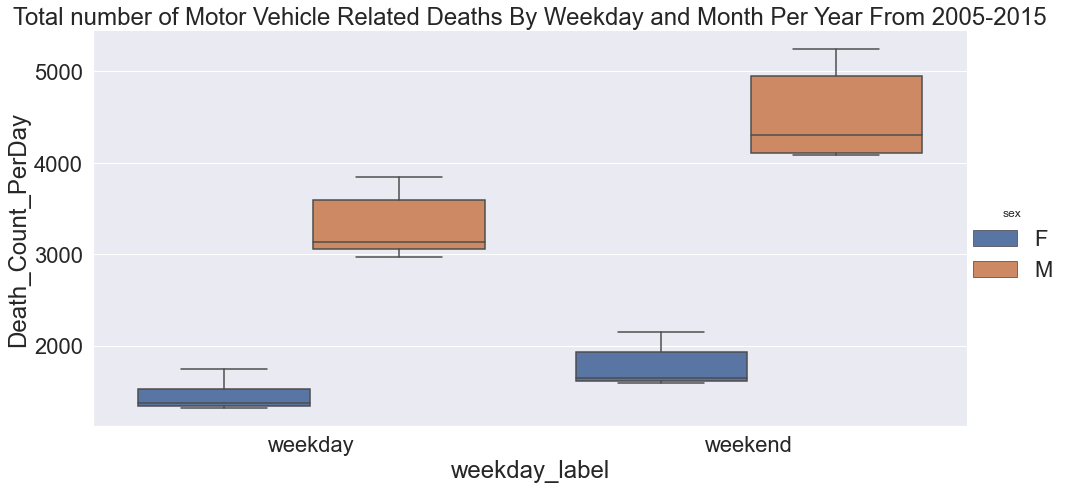

In [15]:
genderWeekendStats =  finalDf.groupby(["sex","weekday_label","current_data_year"])\
                .agg( Death_Count =("death","sum"),nDay = ("day_of_week_of_death","nunique"))\
                                  .reset_index("current_data_year").reset_index("weekday_label").reset_index("sex")
genderWeekendStats["Death_Count_PerDay"] = genderWeekendStats["Death_Count"]/genderWeekendStats["nDay"]
sns.set(font_scale=2)
fig5 = sns.catplot(x = "weekday_label",       # x variable name
            y = "Death_Count_PerDay",       # y variable name
            data = genderWeekendStats ,     # dataframe to plot
            kind = "box",
            hue = "sex",
            height=7,    
            aspect=2) 
plt.title('Total number of Motor Vehicle Related Deaths By Weekday and Month Per Year From 2005-2015')

## Results:
###  p < .05 from Anova we reject the null hypothesis.
###  H1: The mean number of death is different for female and male on the weekend

In [16]:
genderWeekendStats = genderWeekendStats[genderWeekendStats["weekday_label"]=="weekend"]
pg.anova(data=genderWeekendStats, dv='Death_Count_PerDay', between="sex")
weekdayweekendLevene = pg.homoscedasticity(data=genderWeekendStats, dv='Death_Count_PerDay', group="sex")
weekdayweekendAnova = pg.anova(data=genderWeekendStats, dv='Death_Count_PerDay', between="sex")
weekdayweekendPairwise = pg.pairwise_tukey(data=genderWeekendStats, dv='Death_Count_PerDay', between="sex")

print("================")
print("Levene Summary")
print("================")
pg.print_table(weekdayweekendLevene)
pg.print_table(weekdayweekendAnova)
pg.print_table(weekdayweekendPairwise)

Levene Summary
    W    pval  equal_var
-----  ------  -----------
3.354   0.082  True


ANOVA SUMMARY

Source      ddof1    ddof2        F    p-unc    np2
--------  -------  -------  -------  -------  -----
sex             1       20  282.413    0.000  0.934


POST HOC TESTS

A    B      mean(A)    mean(B)       diff       se  tail             T    p-tukey    hedges
---  ---  ---------  ---------  ---------  -------  ---------  -------  ---------  --------
F    M     1780.545   4511.909  -2731.364  162.532  two-sided  -16.805      0.001    -6.894



# Do gender and season have any interction that has an effect on number of motor accident deaths?
## Hypothesis
### Ho: gender will have no significant effect on number of motor accident death
### Ho: season will have no significant effect on number of motor accident death
### Ho: season and gender interaction will have no significant effect on number of motor accident death

Text(0.5, 1.0, 'Total number of Motor Vehicle Related Deaths By Season and Gender, Per Year From 2005-2015 ')

<Figure size 1800x720 with 0 Axes>

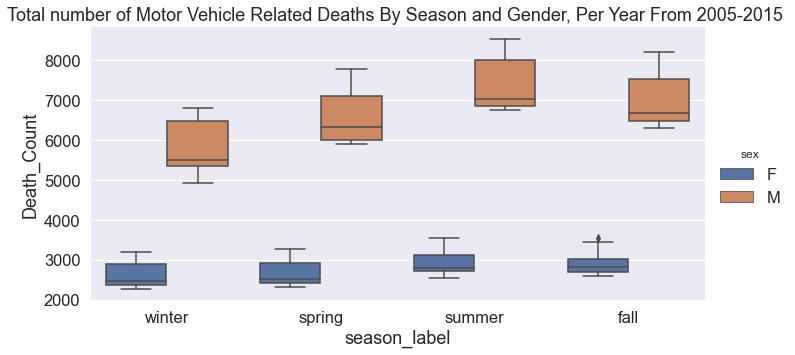

In [17]:
# group gender and seasons
seasonWWStats = finalDf.groupby(["season_label","sex","current_data_year"])\
                .agg( Death_Count =("death","sum"))\
                                  .reset_index("current_data_year").reset_index("sex").reset_index("season_label")
fig6 = plt.figure(figsize=(25,10))
sns.set(font_scale=1.5)
fig6 = sns.catplot(x = "season_label",       # x variable name
            y = "Death_Count",       # y variable name
            data = seasonWWStats,     # dataframe to plot
            kind = "box",
            hue = "sex",
            height=5,    
            aspect=2) 
plt.title('Total number of Motor Vehicle Related Deaths By Season and Gender, Per Year From 2005-2015 ')

## Results:
### H1: gender has  significant effect on number of motor accident death
### H1: season has significant effect on number of motor accident death
### H1: season and gender has significant effect on number of motor accident death

In [18]:
print("================")
print("TWO WAY ANOVA")
print("================")
seasonWWStats.anova(dv="Death_Count", between=["season_label", "sex"]).round(3)

TWO WAY ANOVA


,Source,SS,DF,MS,F,p-unc,np2
0,season_label,1.150702e+07,3,3.835673e+06,12.239,0.000,0.315
1,sex,3.373830e+08,1,3.373830e+08,1076.517,0.000,0.931
2,season_label * sex,4.775645e+06,3,1.591882e+06,5.079,0.003,0.160
3,Residual,2.507219e+07,80,3.134024e+05,NaN,NaN,NaN


# Statistical Testing Strategy
## OneWay Anova
### Assumptions: 
1. The assumption of equal standard deviation in the populations for each group is crucial (equal variance)
2. Normal distribution of each group (if the sample size is big, it is not critical)
3. The assumption of independence of within and across group is crical 
4. The tool is not resistant to severely outlying observations

### Process:
1. Test for equal variance
2. Perform Anova to determine if there is a difference
3. Perform post-hoc to determine where is a difference (>2 groups)
4. Perform f-Oneway to compare two groups

### Test selected
1. Lavene for equal variance test
2. Anova for equal variance groups, welch_anova for inequality of variance
2. Post-hoc tests: pairwise_tukey for equal variance,pairwise_gameshowell

## TwoWay Anova
### Assumptions:
1.two independent variables should each consist of two or more categorical, independent group
2. independence of observations
3. no significant outliers
4. homogeneity of variances for each combination of the groups of the two independent variables

### Test selected
1. Two way Anova


## Null Hypothesis:
1. Levene:H0-the population variances are equal
2. Anova:H0-there is no difference in means
4. Two-way:
        the means of the measurement variable are equal for different values of the first nominal variable; 
        the means are equal for different values of the second nominal variable; 
        there is no interaction (the effects of one nominal variable don't depend on the value of the other nominal variable).